In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from    statsmodels.tsa.seasonal import   seasonal_decompose

## Problem

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.
Data set for the Problem: Sparkling.csv and Rose.csv

## Sparkling

###  Read the data as an appropriate Time Series data and plot the data.

In [2]:
df=pd.read_csv("Sparkling.csv")

In [3]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [5]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [7]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [8]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [9]:
df.tail()

,YearMonth,Sparkling,Time_Stamp
182,1995-03,1897,1995-03-31
183,1995-04,1862,1995-04-30
184,1995-05,1670,1995-05-31
185,1995-06,1688,1995-06-30
186,1995-07,2031,1995-07-31


In [10]:
df.set_index("Time_Stamp",inplace=True)


In [11]:
df.drop("YearMonth",axis=1,inplace=True)

In [12]:
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

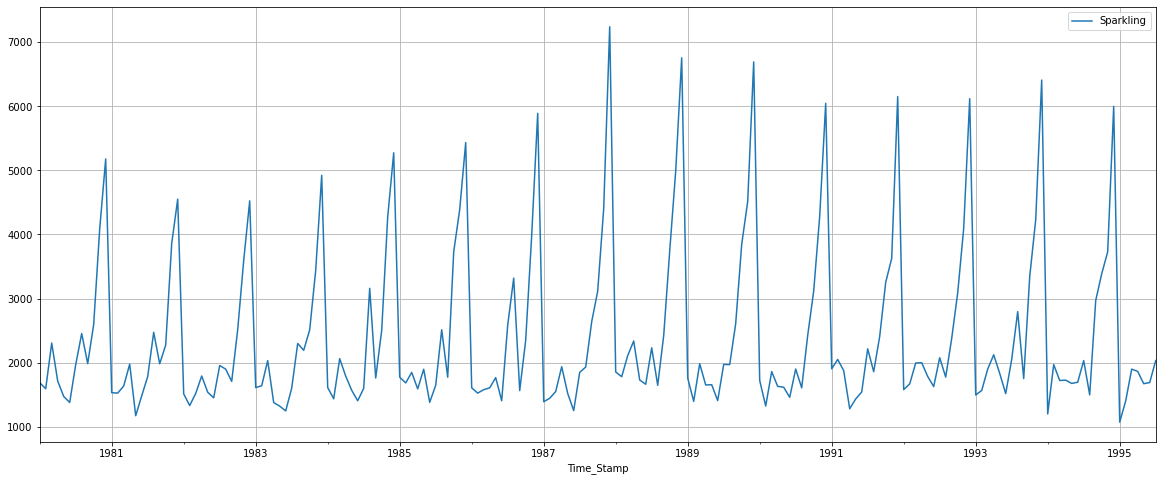

In [14]:
df.plot()
plt.grid();

### Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

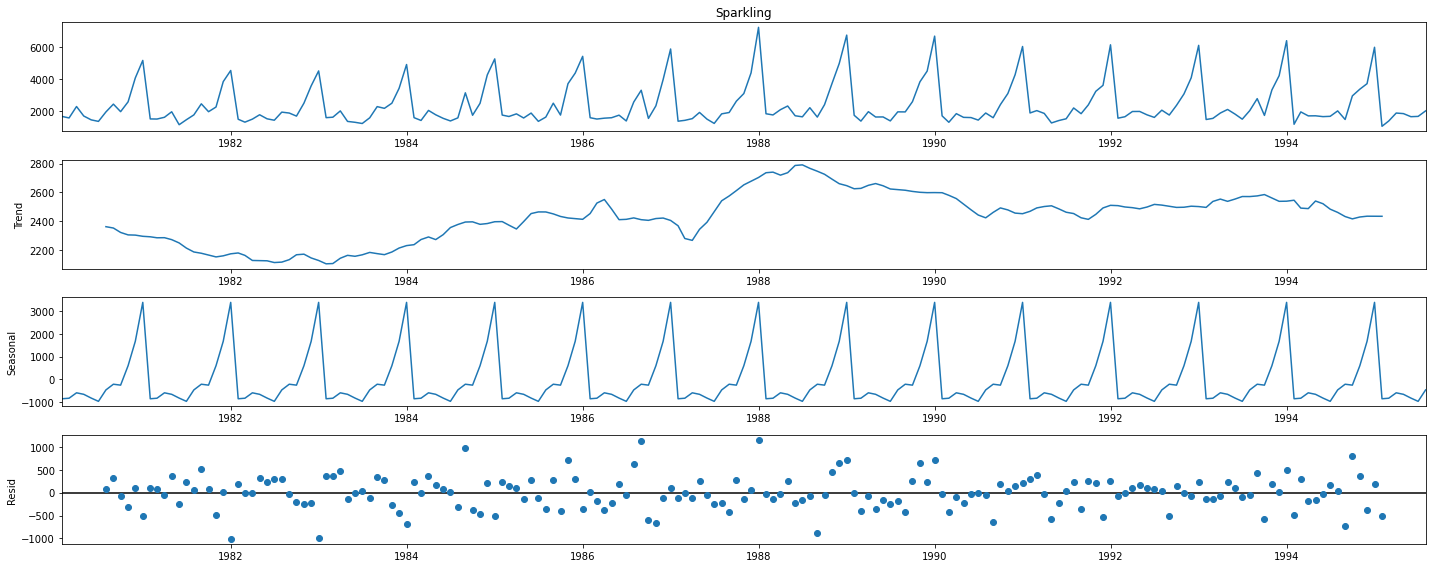

In [15]:
decomposition = seasonal_decompose(df['Sparkling'], model='additive')
decomposition.plot();

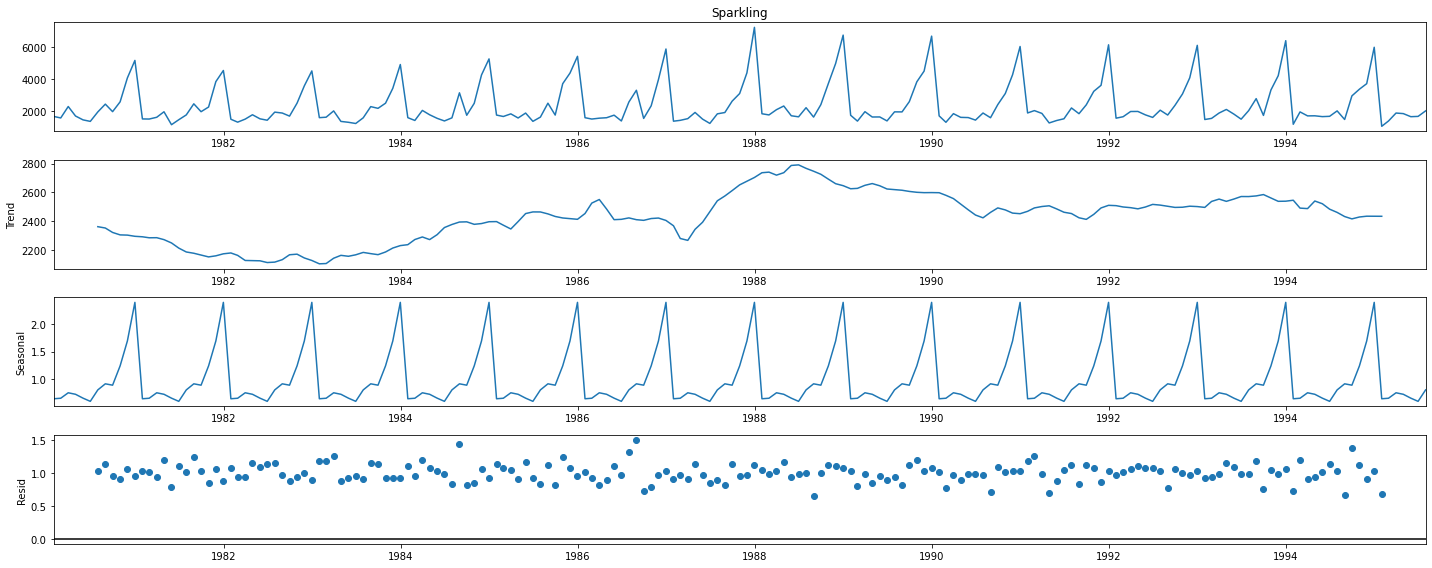

In [16]:
decomposition = seasonal_decompose(df['Sparkling'], model='multiplicative')
decomposition.plot();

In [17]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid


In [18]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


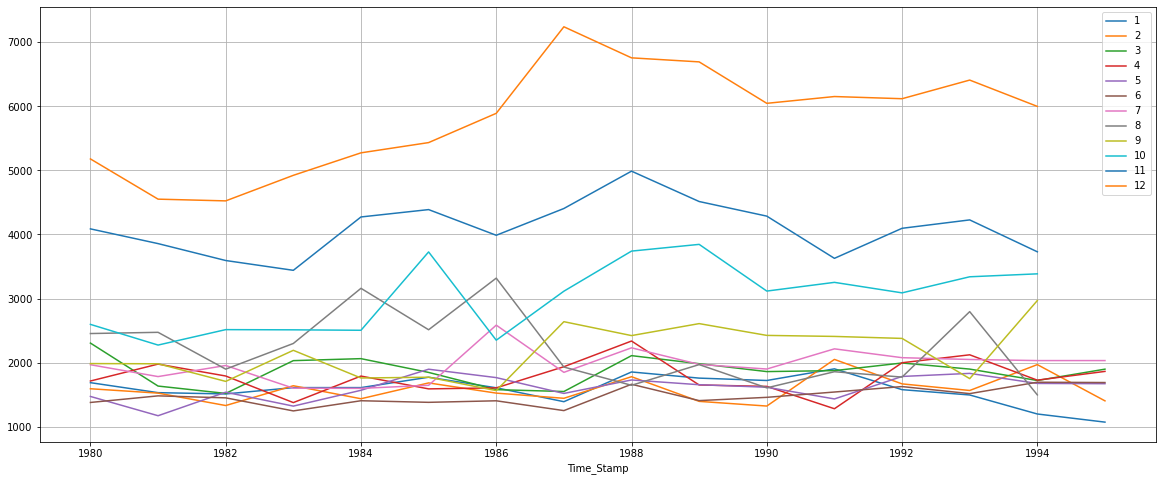

In [19]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [20]:
residual.mean()

0.9997456359115033

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9859988689422607, pvalue=0.07802142202854156)


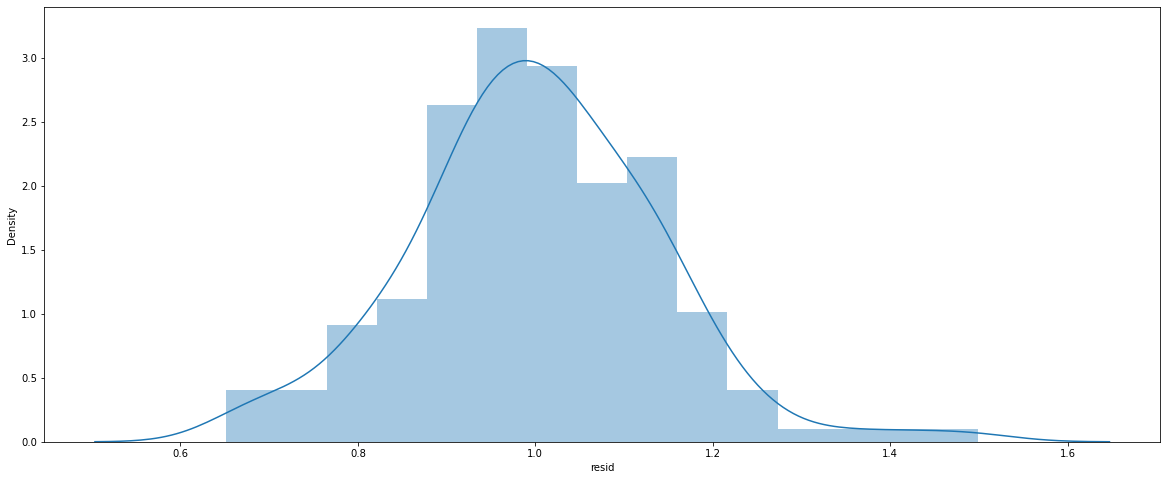

In [21]:
sns.distplot(residual)
from scipy.stats import shapiro
print(shapiro(residual.dropna()))


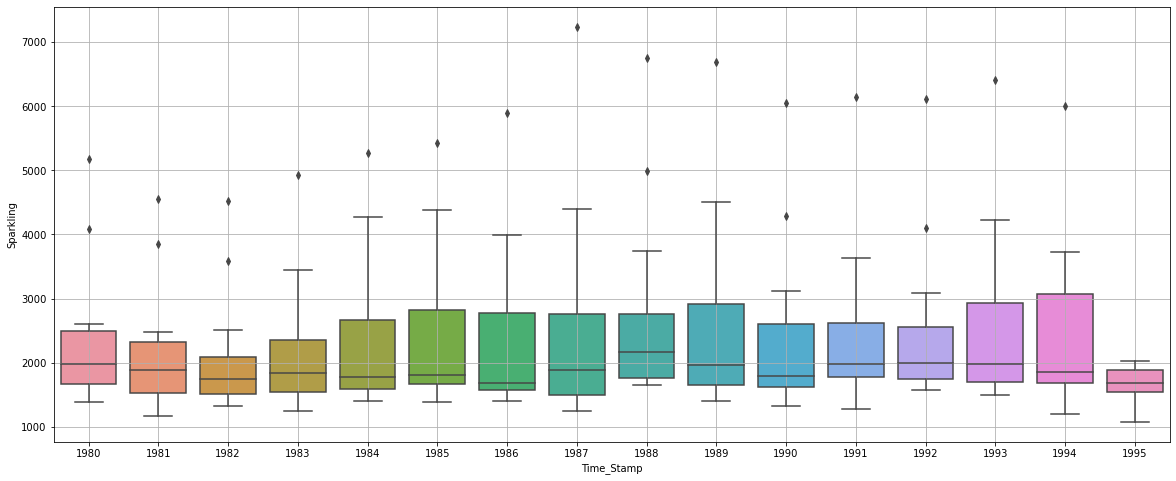

In [22]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

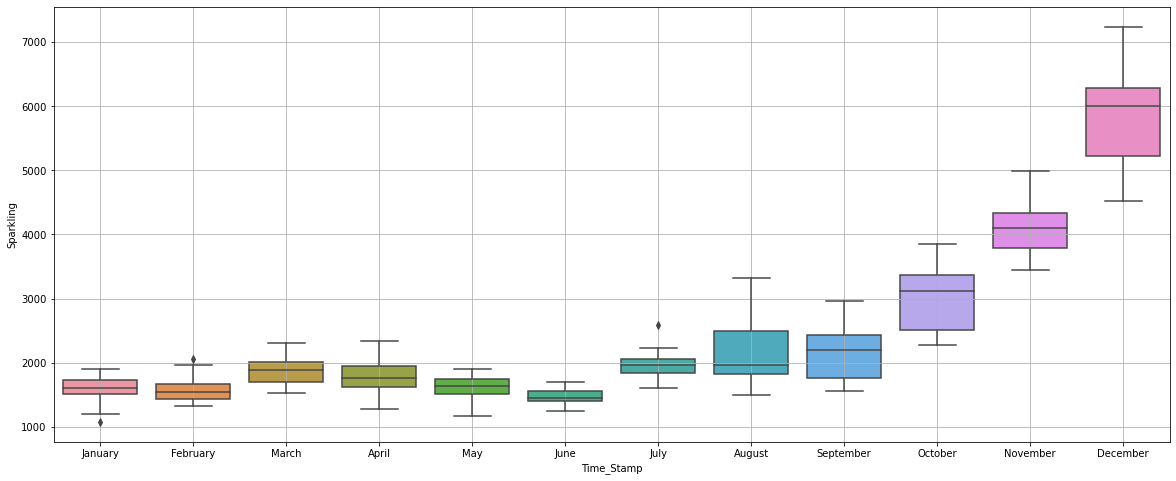

In [23]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

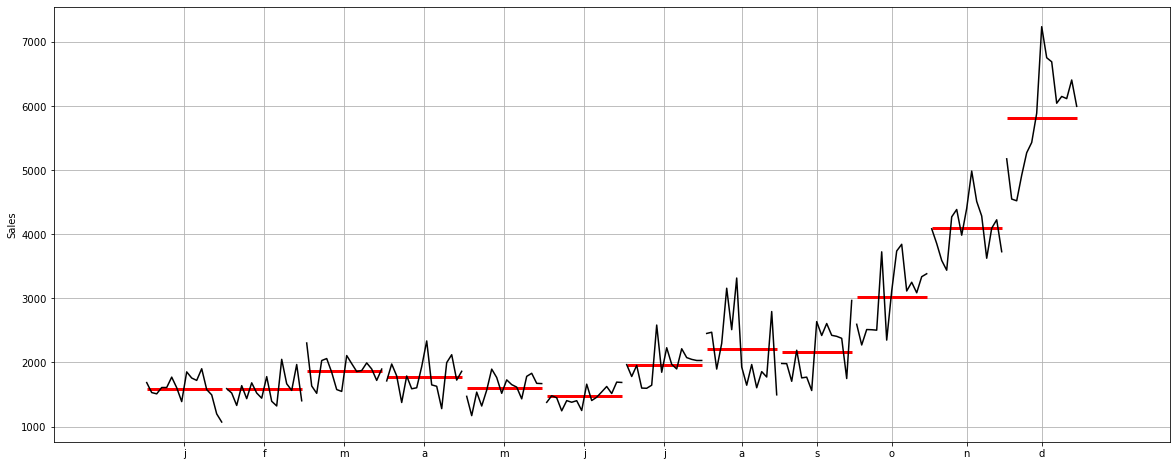

In [24]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

### Split the data into training and test. The test data should start in 1991.

In [25]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [26]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [27]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [28]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


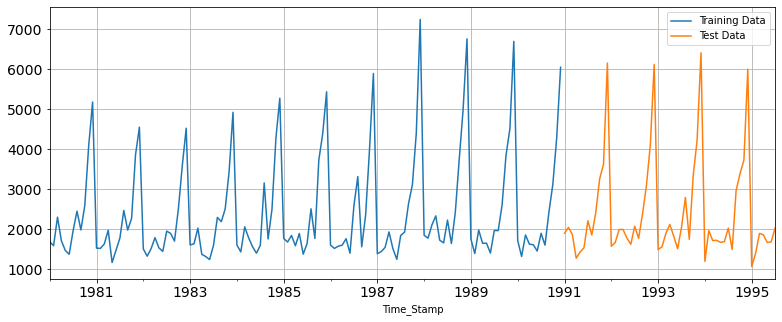

In [29]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

Linear Regression

In [30]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [31]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [32]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)


LinearRegression()

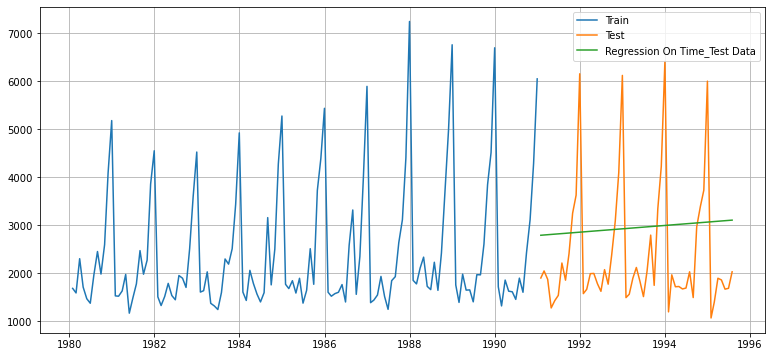

In [35]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [36]:
from sklearn import metrics

In [37]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


naïve forecast models

In [39]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
NaiveModel_train.tail()

,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [41]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

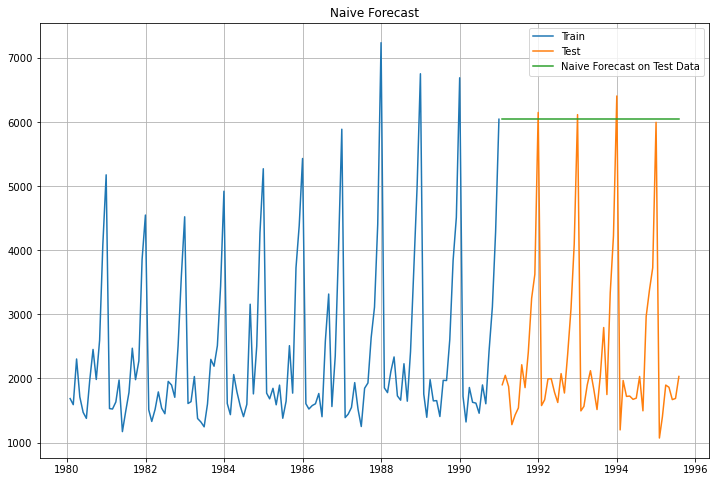

In [42]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [43]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 3864.279


In [44]:
mape_model2_test = metrics.mean_absolute_percentage_error(test['Sparkling'],NaiveModel_test['naive'])
print("For Naive forecast on the Test Data,  MAPE is %3.3f" %(mape_model2_test))

For Naive forecast on the Test Data,  MAPE is 2.013


In [45]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


simple average models

In [46]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [47]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


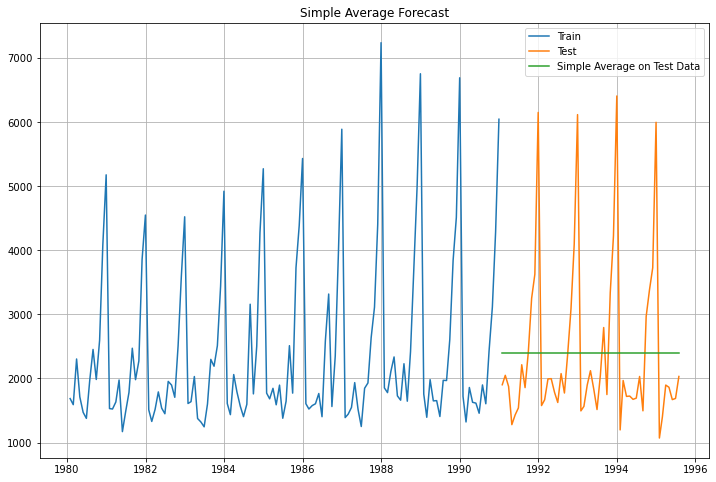

In [48]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [49]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [50]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


Moving Average

In [51]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [52]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Sparkling'].rolling(12).mean()

MovingAverage.head(15)

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9,Trailing_12
Time_Stamp,,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN,NaN
1980-06-30,1377,1424.0,1716.00,1690.166667,NaN,NaN
1980-07-31,1966,1671.5,1631.50,1736.833333,NaN,NaN
1980-08-31,2453,2209.5,1816.75,1880.500000,NaN,NaN
1980-09-30,1984,2218.5,1945.00,1827.166667,1838.222222,NaN


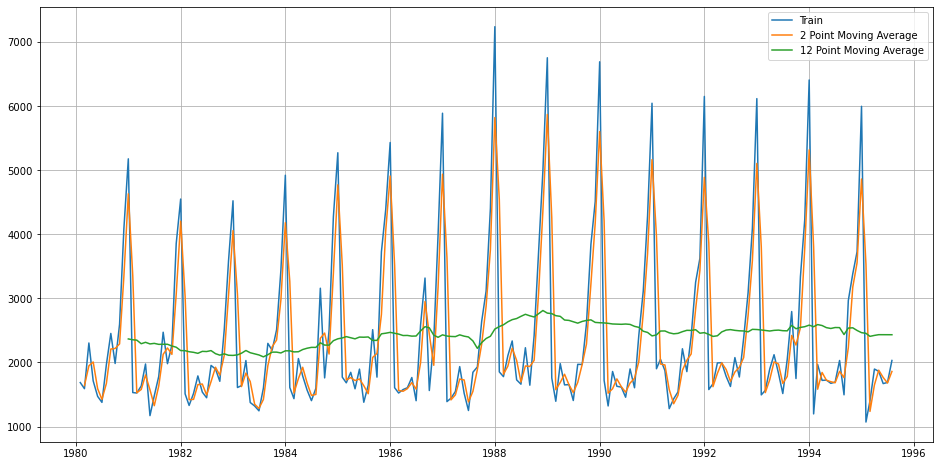

In [53]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
#plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
#plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
#plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [54]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

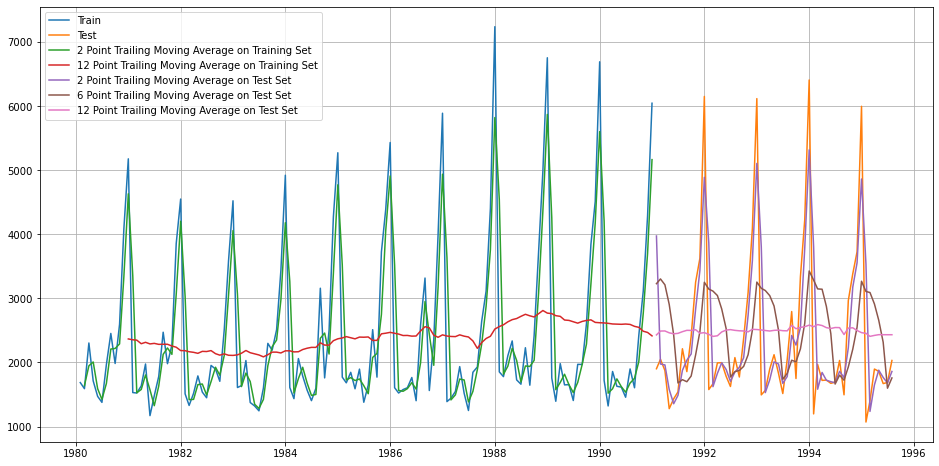

In [55]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
#plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
#plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
#plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_12'],label = '12 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
#plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
#plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_12'],label = '12 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [56]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

## Test Data - RMSE  --> 12 point Trailing MA

rmse_model4_test_12 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_12'],squared=False)
print("For 12 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_12))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 
For 12 point Moving Average Model forecast on the Training Data,  RMSE is 1267.925 


In [57]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9,rmse_model4_test_12]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
12pointTrailingMovingAverage,1267.925330


In [58]:
import statsmodels
statsmodels.__version__

'0.12.2'

Simple exponential smoothing

In [59]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [60]:
SES_train = train.copy()
SES_test = test.copy()

In [61]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [62]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [63]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2724.932624
1991-02-28,2049,2724.932624
1991-03-31,1874,2724.932624
1991-04-30,1279,2724.932624
1991-05-31,1432,2724.932624


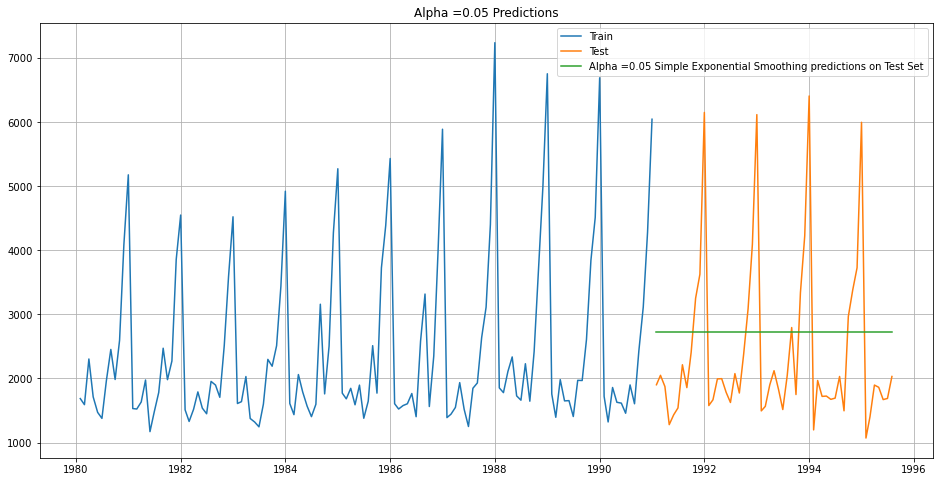

In [65]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');

In [66]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [67]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.05,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
12pointTrailingMovingAverage,1267.925330
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487


In [68]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [69]:
for i in np.arange(0.1,1.1,0.1):
    
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [70]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,1333.873836,1375.393398
1,0.2,1356.042987,1595.206839
2,0.3,1359.511747,1935.507132
3,0.4,1352.588879,2311.919615
4,0.5,1344.004369,2666.351413
5,0.6,1338.805381,2979.204388
6,0.7,1338.844308,3249.944092
7,0.8,1344.462091,3483.801006
8,0.9,1355.723518,3686.794285
9,1.0,1373.082528,3864.279352


In [71]:
SES_test.head()

,Sparkling,predict,"(predict, 0.1)","(predict, 0.2)","(predict, 0.30000000000000004)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6)","(predict, 0.7000000000000001)","(predict, 0.8)","(predict, 0.9)","(predict, 1.0)"
Time_Stamp,,,,,,,,,,,,
1991-01-31,1902,2724.932624,2914.795408,3357.723951,3855.296454,4327.657882,4740.858018,5091.699384,5388.514029,5641.221537,5858.428614,6047.0
1991-02-28,2049,2724.932624,2914.795408,3357.723951,3855.296454,4327.657882,4740.858018,5091.699384,5388.514029,5641.221537,5858.428614,6047.0
1991-03-31,1874,2724.932624,2914.795408,3357.723951,3855.296454,4327.657882,4740.858018,5091.699384,5388.514029,5641.221537,5858.428614,6047.0
1991-04-30,1279,2724.932624,2914.795408,3357.723951,3855.296454,4327.657882,4740.858018,5091.699384,5388.514029,5641.221537,5858.428614,6047.0
1991-05-31,1432,2724.932624,2914.795408,3357.723951,3855.296454,4327.657882,4740.858018,5091.699384,5388.514029,5641.221537,5858.428614,6047.0


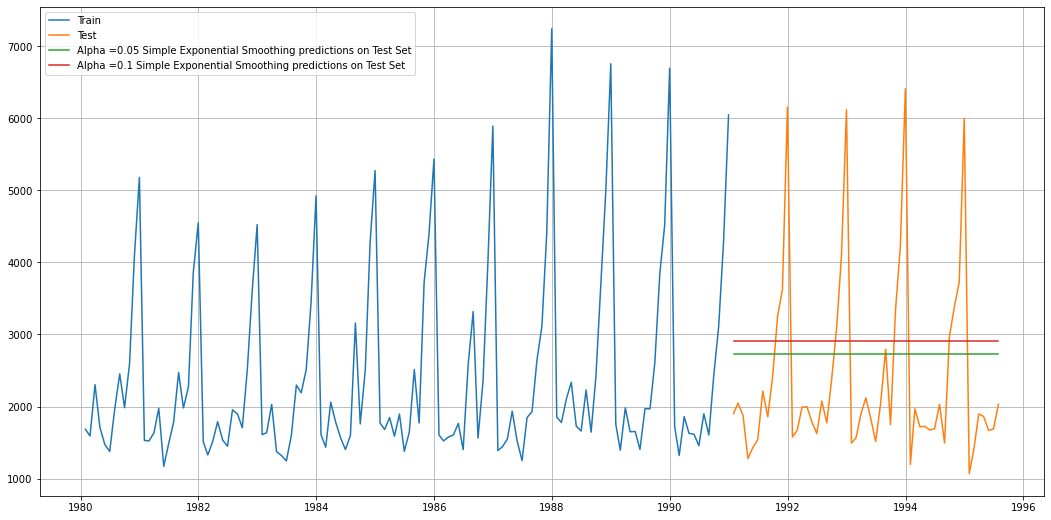

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [73]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
12pointTrailingMovingAverage,1267.925330
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398


Double exponential smoothing

In [74]:
DES_train = train.copy()
DES_test = test.copy()

In [75]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [76]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [78]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [79]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
2,0.1,0.3,1445.762015,4293.084674
3,0.1,0.4,1480.897776,6039.537339
4,0.1,0.5,1521.108657,7390.522201
...,...,...,...,...
95,1.0,0.6,1753.402326,49327.087977
96,1.0,0.7,1825.187155,52655.765663
97,1.0,0.8,1902.013709,55442.273880
98,1.0,0.9,1985.368445,57823.177011


In [80]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
10,0.2,0.1,1418.041591,3611.763322
2,0.1,0.3,1445.762015,4293.084674
20,0.3,0.1,1431.169601,5908.185554


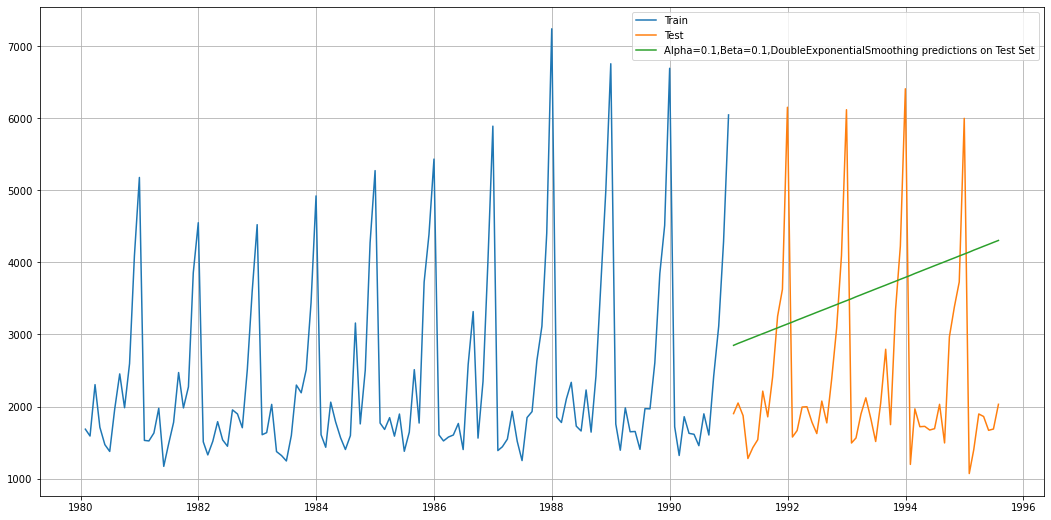

In [81]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [82]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
12pointTrailingMovingAverage,1267.925330
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398


Triple exponential smoothing

In [83]:
TES_train = train.copy()
TES_test = test.copy()

In [84]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'], trend='additive', seasonal='multiplicative', freq='M')

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [85]:
model_TES_autofit = model_TES.fit()

In [86]:
model_TES_autofit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1577.224489
1991-02-28,2049,1333.677558
1991-03-31,1874,1745.945679
1991-04-30,1279,1630.411925
1991-05-31,1432,1523.289070


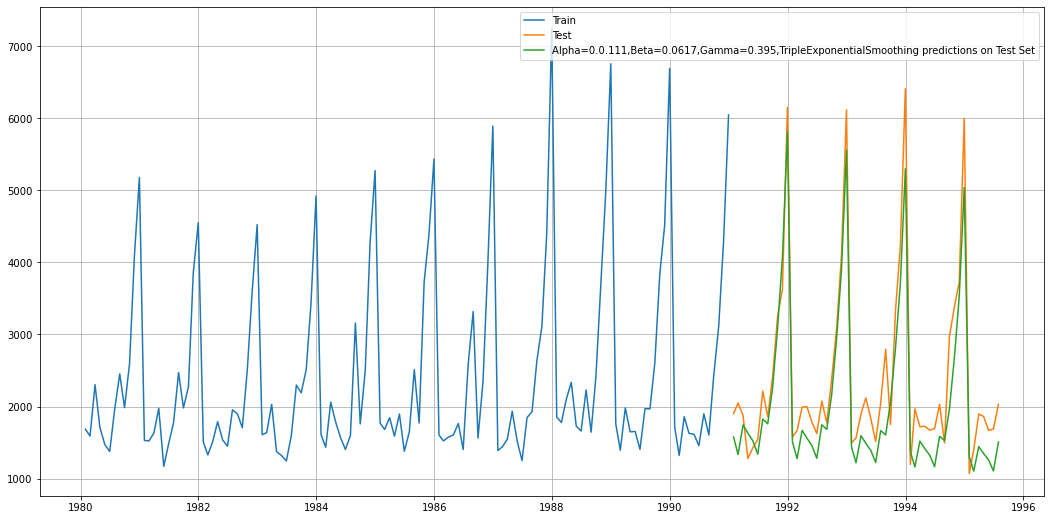

In [88]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0.111,Beta=0.0617,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [89]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.0.111,Beta=0.0617,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.0.111,Beta=0.0617,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.768


In [90]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.0.111,Beta=0.0617,Gamma=0.395,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
12pointTrailingMovingAverage,1267.925330
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398


In [91]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [92]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [93]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,388.351959,5.799963e+02
1,0.1,0.1,0.2,372.002250,6.174690e+02
2,0.1,0.1,0.3,364.222099,6.387802e+02
3,0.1,0.1,0.4,362.590749,6.447620e+02
4,0.1,0.1,0.5,365.655545,6.411226e+02
...,...,...,...,...,...
995,1.0,1.0,0.6,153394.791827,7.989790e+05
996,1.0,1.0,0.7,94040.964957,1.074413e+06
997,1.0,1.0,0.8,102196.953755,5.010607e+06
998,1.0,1.0,0.9,77924.294413,4.318265e+05


In [94]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
301,0.4,0.1,0.2,389.772245,336.715250
211,0.3,0.2,0.2,395.529174,350.145204
110,0.2,0.2,0.1,405.333164,352.571689
200,0.3,0.1,0.1,394.630053,352.607849
20,0.1,0.3,0.1,414.423963,354.534561


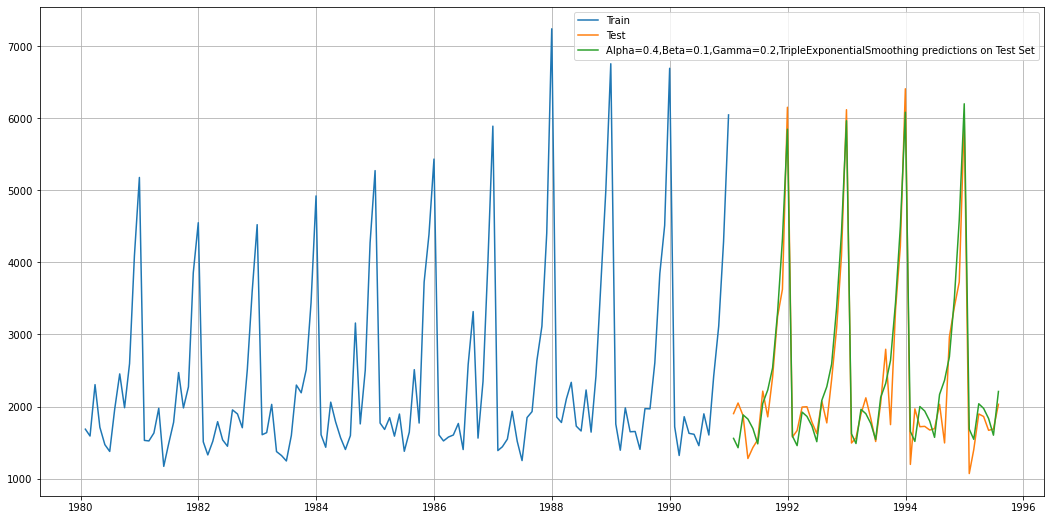

In [95]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [96]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
12pointTrailingMovingAverage,1267.925330
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398


In [97]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",336.715250
"Alpha=0.0.111,Beta=0.0617,Gamma=0.395,TripleExponentialSmoothing",469.767970
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
12pointTrailingMovingAverage,1267.925330
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398


### Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [99]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

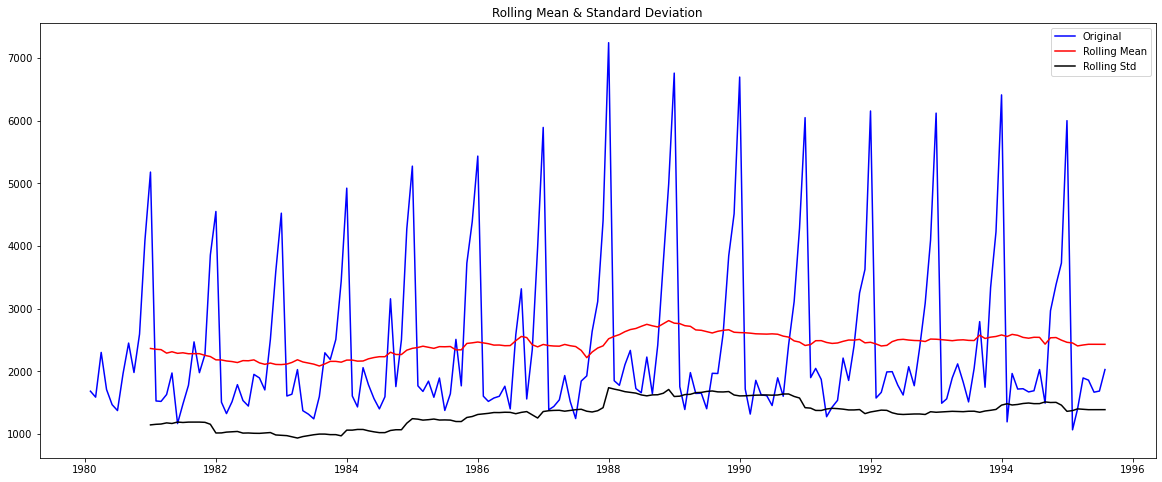

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [100]:
test_stationarity(df['Sparkling'])

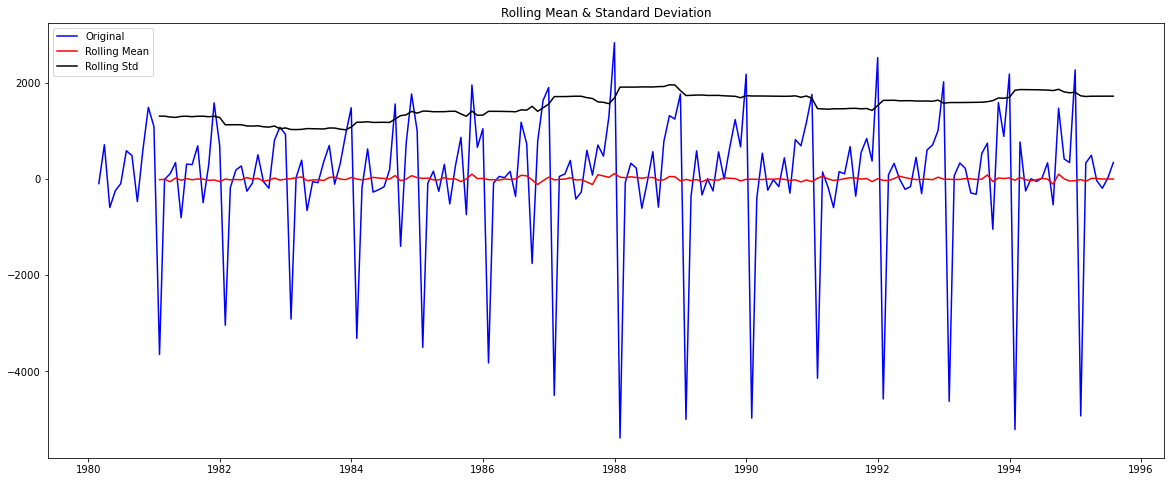

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [101]:
test_stationarity(df['Sparkling'].diff().dropna())

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [103]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [104]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [105]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train.values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 2) - AIC:2232.78309768405
ARIMA(0, 1, 3) - AIC:2233.016605137543
ARIMA(1, 1, 0) - AIC:2268.5280607650034
ARIMA(1, 1, 1) - AIC:2235.0139453511238


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.

ARIMA(1, 1, 2) - AIC:2233.59764711907


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 3) - AIC:2234.5741415458488
ARIMA(2, 1, 0) - AIC:2262.035600155025


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:2232.360489884417


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                 

ARIMA(2, 1, 2) - AIC:2210.618562220438


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                 

ARIMA(2, 1, 3) - AIC:2229.3580937706574
ARIMA(3, 1, 0) - AIC:2259.471554891012


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(3, 1, 1) - AIC:2233.921757231831


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                 

ARIMA(3, 1, 2) - AIC:2228.928204126895
ARIMA(3, 1, 3) - AIC:2225.6615585248464


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                 

In [106]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2210.618562
15,"(3, 1, 3)",2225.661559
14,"(3, 1, 2)",2228.928204
11,"(2, 1, 3)",2229.358094
9,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
3,"(0, 1, 3)",2233.016605
6,"(1, 1, 2)",2233.597647
13,"(3, 1, 1)",2233.921757
7,"(1, 1, 3)",2234.574142


In [107]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.730
Date:                Tue, 15 Feb 2022   AIC                           2210.619
Time:                        15:54:56   BIC                           2227.870
Sample:                    02-29-1980   HQIC                          2217.628
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5843      0.518     10.790      0.000       4.570       6.599
ar.L1.D.Sparkling     1.2700      0.074     17.048      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                 

In [108]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [109]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.546023727508


In [110]:
resultsDf1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf1

,Test RMSE
"ARIMA(2,1,2)",1374.546024


In [111]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (0, 1, 4)(0, 0, 4, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (1, 1, 4)(1, 0, 4, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (2, 1, 4)(2, 0, 4, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)
Model: (3, 1, 4)(3, 0, 4, 6)
Model: (4, 1, 0)(4, 0, 0, 6)
Model: (4, 1, 1)(4, 0, 1, 6)
Model: (4, 1, 2)(4, 0, 2, 6)
Model: (4, 1, 3)(4, 0, 3, 6)
Model: (4, 1, 4)(4, 0, 4, 6)


In [112]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [113]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            initialization = 'approximate_diffuse')
            
        results_SARIMA = SARIMA_model.fit(maxiter=10000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2285.43086859048
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2287.6415538252477
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:2195.3668560191672
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:2204.370609422287


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0)x(0, 0, 4, 6) - AIC:2161.2375381299607
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2282.672275938098
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2215.4120243193674
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:2167.305984416394
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:2144.3786461069076
SARIMA(0, 1, 0)x(1, 0, 4, 6) - AIC:2133.419885442292
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:2078.100830697112
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:2079.784480508813


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:2051.72624318736
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:2060.2931122256846
SARIMA(0, 1, 0)x(2, 0, 4, 6) - AIC:2070.8057947664342
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:2068.9514362148643
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:2070.747294378813
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:2058.869413783437
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:2062.086296345872
SARIMA(0, 1, 0)x(3, 0, 4, 6) - AIC:2072.790758849747
SARIMA(0, 1, 0)x(4, 0, 0, 6) - AIC:2068.0722228136815
SARIMA(0, 1, 0)x(4, 0, 1, 6) - AIC:2069.3599483462112
SARIMA(0, 1, 0)x(4, 0, 2, 6) - AIC:2069.2161792527013
SARIMA(0, 1, 0)x(4, 0, 3, 6) - AIC:2071.2161505212553
SARIMA(0, 1, 0)x(4, 0, 4, 6) - AIC:2072.5492289155213
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2281.19465680223
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2282.3470058442476
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:2173.2755509377635
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:2185.1483761235086
SARIMA(0, 1, 1)x(0, 0, 4, 6) - AIC:2145.0503828192186
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(0, 1, 4)x(0, 0, 0, 6) - AIC:2253.9305888574645
SARIMA(0, 1, 4)x(0, 0, 1, 6) - AIC:2254.923521773263
SARIMA(0, 1, 4)x(0, 0, 2, 6) - AIC:2161.6064589787356
SARIMA(0, 1, 4)x(0, 0, 3, 6) - AIC:2168.6123717191876
SARIMA(0, 1, 4)x(0, 0, 4, 6) - AIC:2131.26583326363
SARIMA(0, 1, 4)x(1, 0, 0, 6) - AIC:2227.0523880192004
SARIMA(0, 1, 4)x(1, 0, 1, 6) - AIC:2144.093099829273
SARIMA(0, 1, 4)x(1, 0, 2, 6) - AIC:2104.726029383247
SARIMA(0, 1, 4)x(1, 0, 3, 6) - AIC:2095.621518665587
SARIMA(0, 1, 4)x(1, 0, 4, 6) - AIC:2088.633491659192
SARIMA(0, 1, 4)x(2, 0, 0, 6) - AIC:2033.1340459530425
SARIMA(0, 1, 4)x(2, 0, 1, 6) - AIC:2035.0300051802958
SARIMA(0, 1, 4)x(2, 0, 2, 6) - AIC:2009.7783404432557
SARIMA(0, 1, 4)x(2, 0, 3, 6) - AIC:2023.500457944238
SARIMA(0, 1, 4)x(2, 0, 4, 6) - AIC:2034.8986290896937
SARIMA(0, 1, 4)x(3, 0, 0, 6) - AIC:2024.4716593258527
SARIMA(0, 1, 4)x(3, 0, 1, 6) - AIC:2026.4583845935365
SARIMA(0, 1, 4)x(3, 0, 2, 6) - AIC:2013.8746793745727
SARIMA(0, 1, 4)x(3, 0, 3, 6) - AIC:2

SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:2188.5925794712034
SARIMA(2, 1, 0)x(0, 0, 4, 6) - AIC:2148.263082767058
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:2276.324294859889
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:2206.935101877187
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:2153.5365611586594
SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:2132.303584509268
SARIMA(2, 1, 0)x(1, 0, 4, 6) - AIC:2126.5889733892495
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:2047.019961308955
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:2047.2695399619276
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:2029.6338922766354
SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:2030.984488142323
SARIMA(2, 1, 0)x(2, 0, 4, 6) - AIC:2043.4205757525062
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:2046.3259731790536
SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:2047.2232543183777
SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:2032.820954235569
SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:2044.0885627241817
SARIMA(2, 1, 0)x(3, 0, 4, 6) - AIC:2051.8306318768377
SARIMA(2, 1, 0)x(4, 0, 0, 6) - AIC:2042.5992842277165
SARIMA(2, 1, 0)x(4, 0, 1, 6) - AIC:

SARIMA(3, 1, 1)x(1, 0, 1, 6) - AIC:2139.4459761254907
SARIMA(3, 1, 1)x(1, 0, 2, 6) - AIC:2095.988124454352
SARIMA(3, 1, 1)x(1, 0, 3, 6) - AIC:2086.908143231732
SARIMA(3, 1, 1)x(1, 0, 4, 6) - AIC:2082.3081344648217
SARIMA(3, 1, 1)x(2, 0, 0, 6) - AIC:2023.3077556377193
SARIMA(3, 1, 1)x(2, 0, 1, 6) - AIC:2026.2582873379763
SARIMA(3, 1, 1)x(2, 0, 2, 6) - AIC:2010.636355067953
SARIMA(3, 1, 1)x(2, 0, 3, 6) - AIC:2018.7077201592253
SARIMA(3, 1, 1)x(2, 0, 4, 6) - AIC:2039.530572046951
SARIMA(3, 1, 1)x(3, 0, 0, 6) - AIC:2034.221714658812
SARIMA(3, 1, 1)x(3, 0, 1, 6) - AIC:2034.6050827467807
SARIMA(3, 1, 1)x(3, 0, 2, 6) - AIC:2030.5450483230302
SARIMA(3, 1, 1)x(3, 0, 3, 6) - AIC:2032.5302507498845
SARIMA(3, 1, 1)x(3, 0, 4, 6) - AIC:2035.024255386285
SARIMA(3, 1, 1)x(4, 0, 0, 6) - AIC:2034.0511769989678
SARIMA(3, 1, 1)x(4, 0, 1, 6) - AIC:2034.0710107759228
SARIMA(3, 1, 1)x(4, 0, 2, 6) - AIC:2063.2405789277773
SARIMA(3, 1, 1)x(4, 0, 3, 6) - AIC:2035.0653374278472
SARIMA(3, 1, 1)x(4, 0, 4, 6) - AIC

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(3, 1, 4)x(0, 0, 0, 6) - AIC:2237.3850562188554
SARIMA(3, 1, 4)x(0, 0, 1, 6) - AIC:2242.196732683212
SARIMA(3, 1, 4)x(0, 0, 2, 6) - AIC:2150.1607614696736
SARIMA(3, 1, 4)x(0, 0, 3, 6) - AIC:2163.022532537189
SARIMA(3, 1, 4)x(0, 0, 4, 6) - AIC:2132.5808750161286
SARIMA(3, 1, 4)x(1, 0, 0, 6) - AIC:2219.2134109560398
SARIMA(3, 1, 4)x(1, 0, 1, 6) - AIC:2073.082928472103
SARIMA(3, 1, 4)x(1, 0, 2, 6) - AIC:2059.862407909417
SARIMA(3, 1, 4)x(1, 0, 3, 6) - AIC:2066.1510133919014
SARIMA(3, 1, 4)x(1, 0, 4, 6) - AIC:2064.257601335691
SARIMA(3, 1, 4)x(2, 0, 0, 6) - AIC:2031.9682836452307
SARIMA(3, 1, 4)x(2, 0, 1, 6) - AIC:2021.514059368471
SARIMA(3, 1, 4)x(2, 0, 2, 6) - AIC:2016.3122782516818
SARIMA(3, 1, 4)x(2, 0, 3, 6) - AIC:2030.8131837208284
SARIMA(3, 1, 4)x(2, 0, 4, 6) - AIC:2043.4280700260158
SARIMA(3, 1, 4)x(3, 0, 0, 6) - AIC:2056.8573630071824
SARIMA(3, 1, 4)x(3, 0, 1, 6) - AIC:2039.7653673844734
SARIMA(3, 1, 4)x(3, 0, 2, 6) - AIC:2064.5335201562934
SARIMA(3, 1, 4)x(3, 0, 3, 6) - AIC

In [114]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
287,"(2, 1, 1)","(2, 0, 2, 6)",2004.405208
62,"(0, 1, 2)","(2, 0, 2, 6)",2004.527202
187,"(1, 1, 2)","(2, 0, 2, 6)",2006.914723
37,"(0, 1, 1)","(2, 0, 2, 6)",2007.195159
87,"(0, 1, 3)","(2, 0, 2, 6)",2007.742155


In [115]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 1),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(2, 0, [1, 2], 6)   Log Likelihood                -864.020
Date:                                Tue, 15 Feb 2022   AIC                           1744.041
Time:                                        17:44:01   BIC                           1766.138
Sample:                                             0   HQIC                          1753.012
                                                - 132                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0502      0.122      0.411      0.681      -0.189       0.290
ar.

In [116]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [117]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1387.944431,383.219488,636.848037,2139.040825
1,1170.771652,390.135720,406.119692,1935.423612
2,1609.310401,390.462461,844.018040,2374.602762
3,1471.802254,393.253415,701.039724,2242.564784
4,1332.684373,397.015634,554.548029,2110.820718


In [118]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

636.214759642355


In [119]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(2,1,1)(2,0,2,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"ARIMA(2,1,2)",1374.546024
"SARIMA(2,1,1)(2,0,2,6)",636.214760


In [120]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [121]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [122]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846013
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236748
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388796
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791871
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610893
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920836
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566526
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573264204
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838495
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377595
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144030938
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177198
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085400543
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018826079407
SARIMA(0, 1

In [123]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584248
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.076790
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121579
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [124]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Tue, 15 Feb 2022   AIC                           1555.584
Time:                                    17:45:35   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6283      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

In [125]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [126]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.420690,388.340435,566.287424,2088.553956
1,1315.131011,401.998581,527.228271,2103.033752
2,1621.592088,401.992199,833.701856,2409.482321
3,1598.894150,407.229343,800.739304,2397.048996
4,1392.700709,407.958777,593.116199,2192.285219


In [127]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6113639398799


In [128]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"ARIMA(2,1,2)",1374.546024
"SARIMA(2,1,1)(2,0,2,6)",636.214760
"SARIMA(1,1,2)(1,0,2,12)",528.611364


### Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


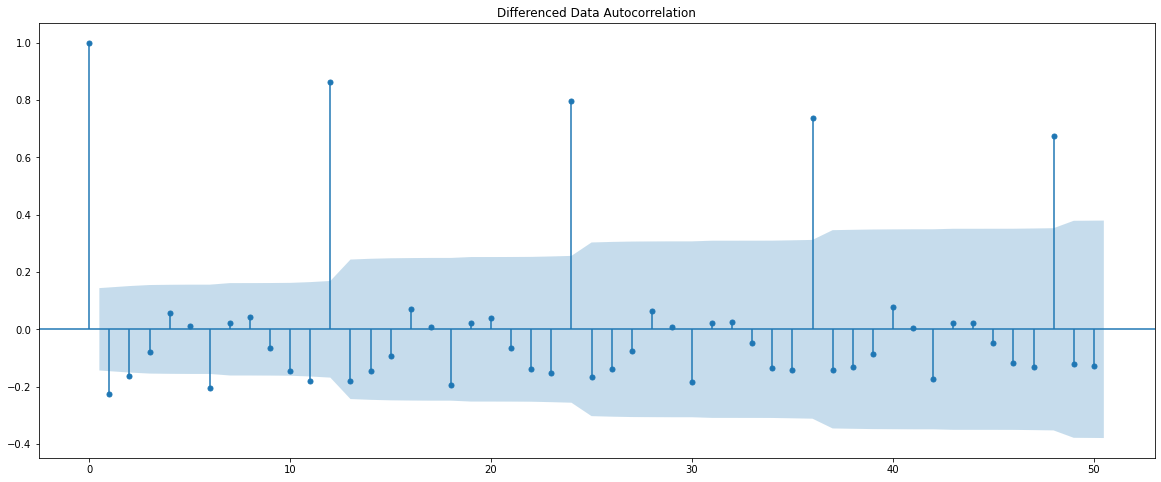

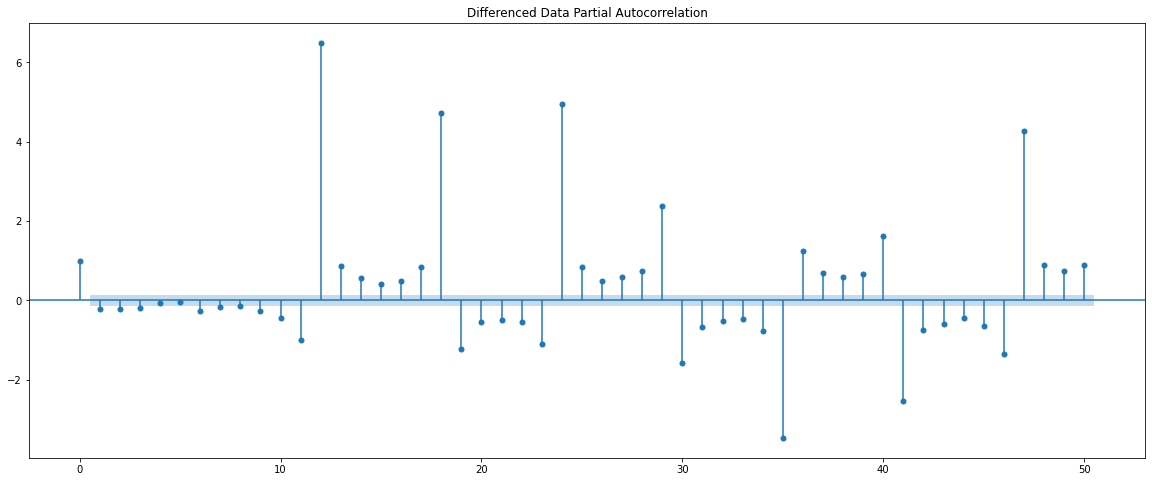

In [129]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [130]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Tue, 15 Feb 2022   AIC                           2269.583
Time:                        17:45:36   BIC                           2275.333
Sample:                    02-29-1980   HQIC                          2271.919
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [131]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [132]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

4779.15429919654


In [133]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"ARIMA(2,1,2)",1374.546024
"SARIMA(2,1,1)(2,0,2,6)",636.214760
"SARIMA(1,1,2)(1,0,2,12)",528.611364
"ARIMA(0,1,0)",4779.154299


In [134]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 6)   Log Likelihood               -1130.492
Date:                           Tue, 15 Feb 2022   AIC                           2262.984
Time:                                   17:45:36   BIC                           2265.804
Sample:                                        0   HQIC                          2264.129
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.842e+06    5.1e+05      9.495      0.000    3.84e+06    5.84e+06
Ljung-Box (L1) (Q):                   1.89 

In [135]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(0,1,0,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

27078.593877485924


,Test RMSE
"ARIMA(2,1,2)",1374.546024
"SARIMA(2,1,1)(2,0,2,6)",636.214760
"SARIMA(1,1,2)(1,0,2,12)",528.611364
"ARIMA(0,1,0)",4779.154299
"SARIMA(0,1,0)(0,1,0,6)",27078.593877


### Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [136]:
resultsDf1 = pd.concat([resultsDf1,resultsDf])

resultsDf1

,Test RMSE
"ARIMA(2,1,2)",1374.546024
"SARIMA(2,1,1)(2,0,2,6)",636.214760
"SARIMA(1,1,2)(1,0,2,12)",528.611364
"ARIMA(0,1,0)",4779.154299
"SARIMA(0,1,0)(0,1,0,6)",27078.593877
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694


In [137]:
resultsDf1.sort_values(["Test RMSE"],ascending=True)

,Test RMSE
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",336.715250
"Alpha=0.0.111,Beta=0.0617,Gamma=0.395,TripleExponentialSmoothing",469.767970
"SARIMA(1,1,2)(1,0,2,12)",528.611364
"SARIMA(2,1,1)(2,0,2,6)",636.214760
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
12pointTrailingMovingAverage,1267.925330
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
"Alpha=0.05,SimpleExponentialSmoothing",1316.035487


### Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [101]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)

C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Pradeep Mishra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [102]:
RMSE_fullmodel2 = metrics.mean_squared_error(df['Sparkling'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 377.29032542281715


In [103]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=12)

In [104]:
prediction_2

1995-08-31    2063.370030
1995-09-30    2579.777769
1995-10-31    3418.086343
1995-11-30    4308.589385
1995-12-31    6615.784148
1996-01-31    1566.940526
1996-02-29    1852.450225
1996-03-31    2101.024170
1996-04-30    2024.178682
1996-05-31    1835.548594
1996-06-30    1713.199103
1996-07-31    2177.175089
Freq: M, dtype: float64

In [105]:
prediction_2.index.day

Int64Index([31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31], dtype='int64')

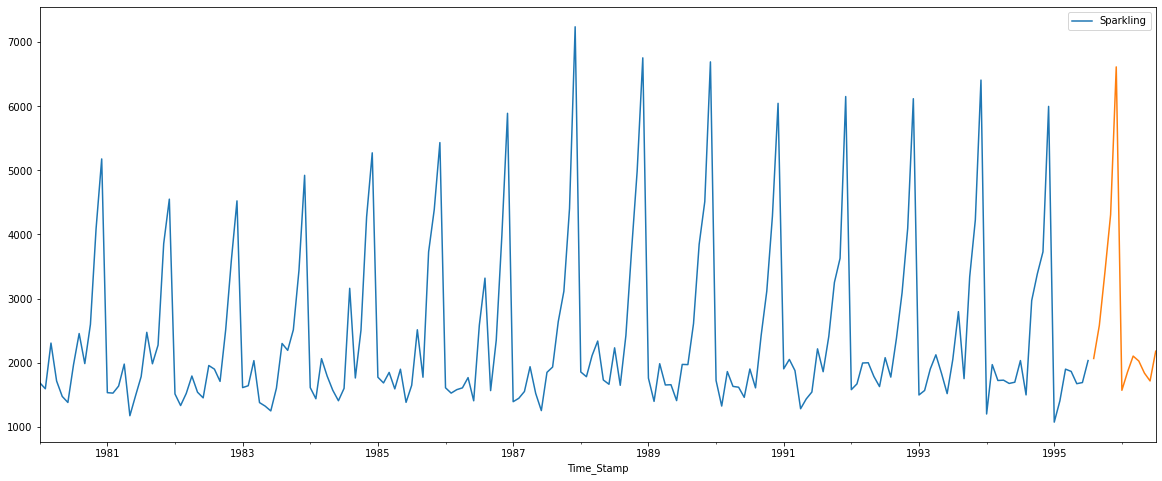

In [106]:
df.plot()
prediction_2.plot();

In [107]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel2.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,1321.896024,2063.370030,2804.844037
1995-09-30,1838.303763,2579.777769,3321.251776
1995-10-31,2676.612337,3418.086343,4159.560350
1995-11-30,3567.115379,4308.589385,5050.063392
1995-12-31,5874.310141,6615.784148,7357.258154


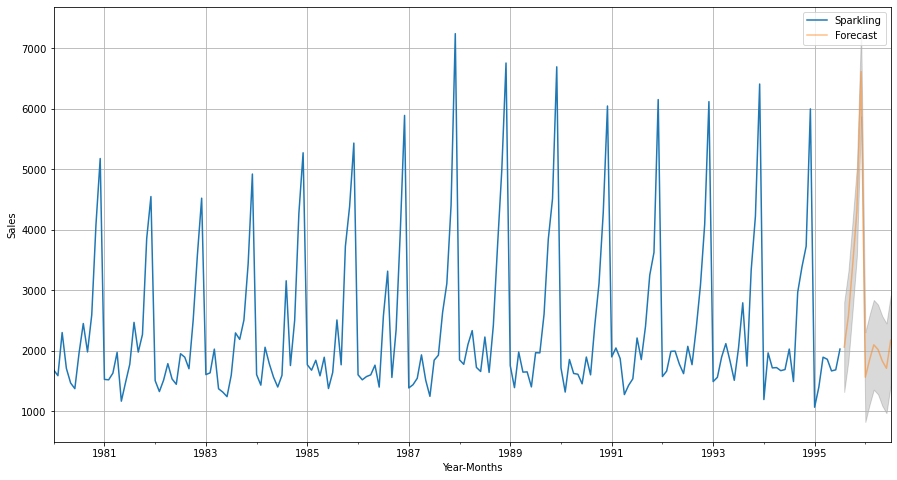

In [108]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

### Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.